**TITANIC** 

Wich people will suvive the Titanic shipwreck

In [1]:
#These legend is enghish language(EN) and portuguese-Brizil(PT)

In [2]:
# EN(The goal of this projects is to use machine learning to know wich and how much people will suvived in Titanic shipwreck)
# PT(O objetivo desse projeto e usar machine learning para saber quais e quantas pessoas iram sobreviver ao nalfrágio do titanic)


# EN(I will use the Logistics-Regression with train_test_split)
# PT(Eu irei usar o Logistics-Regression com train_test_split)

In [3]:
!pip install python -m inline_importer


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
#EN(Loading the datasets)
#PT(Carregando base de dados)
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [6]:
#EN(Passengers embarked on these cities [S= Southampton, C=Cherbourg, Q=Queenstown])
#PT(Passageiros que embarcaram nessas cidades [S= Southampton, C=Cherbourg, Q=Queenstown])
print(train.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
#EN(Identification of the cabins)
#PT(Identificação das cabines)
print(test.Cabin.value_counts())

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64


In [8]:
print(train.shape)
print(train.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# EN(Check the age column)
# PT(Checando a coluna idade)
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# EN(The people who boarded had an average of 29 years old and 
#     The City with the most people is Southampton. Zeroing missing values in the age column)

# PT(As pessoas que embarcaram tinham uma média de 29 anos de idade e 
#      a cidade com a maioria das pessoas é Southampton. Zerando valores faltantes na coluna de idade)
print(train.Age.mean())
print(train.Embarked.mode())
train = train.fillna({'Age': train.Age.mean(), 'Emblarked': train.Embarked.mode()})

29.69911764705882
0    S
dtype: object


In [11]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# EN(Deleting columns not important)
# PT(Excluindo colunas não importantes)
train = train.drop(['Cabin'], axis=1)

In [13]:
test = test.drop(['Cabin'], axis=1)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


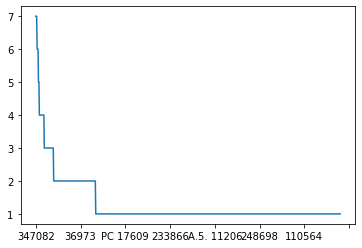

In [15]:
train.Ticket.value_counts().plot()

In [16]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [17]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [18]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [19]:
# EN(We goin to transform text value to numerics)
# PT(Nos vamos transformar valores tetuais em valores numericos)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
catcol = ['Sex', 'Embarked']
train[catcol] = train[catcol].apply(le.fit_transform)
test[catcol] = test[catcol].apply(le.fit_transform)

In [20]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [22]:
test = test.fillna({'Age': test.Age.mean(), 'Fare': test.Fare.mean()})

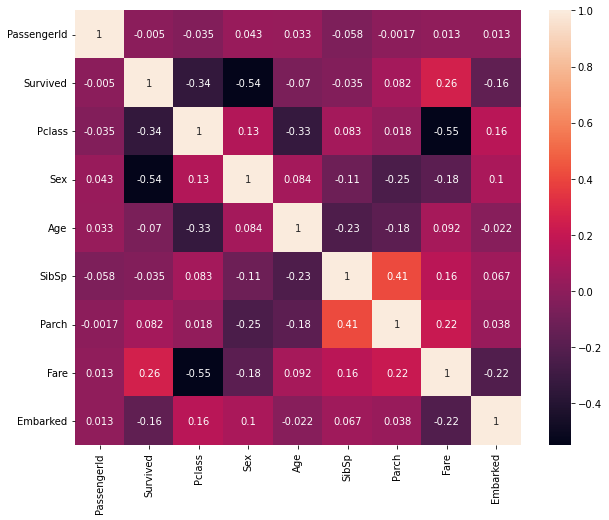

In [23]:
# EN(Check the covariance)
# PT(Checando a covariancia)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [24]:
x = train.drop(["Survived"], axis=1)
y = train["Survived"]

#EN(Split the dataset in 80% by train and 20% by validation, a random_state diferent of 0 to ever coming the same values)
#PT(Dividir o dataset em 80% para o treinamento e 20% para a validação, um random_state diferente de 0 para sempre vir os mesmos valores)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [25]:
# EN(Import modules)
# PT(Importando modulos)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# EN(Instantiate an imputer)
# PT(Instanciar o imputador [SimpleImputer])
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(x_train)

#EN(Apply missing values to all data)
#PT(Aplicando em todos os dados)
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)
test = imputer.transform(test)

In [26]:
#EN(Creating a model with LogisticRegression)
#PT(Criando um modelo com a regressão logistica)
model = LogisticRegression(penalty='none', random_state=1)

In [27]:
#EN(Training the trains data on model)
#PT(Treinando os dados de treinamento no modelo)
model = model.fit(x_train, y_train)

In [28]:
y_test_predicted = model.predict(x_test)

In [29]:
#EN(Checking the score of mode)
#PT(Checando a precisão do modelo)
from sklearn.metrics import accuracy_score
print(f'The model has an accuracy of {round(accuracy_score(y_test, y_test_predicted)*100,2)}%')
#EN(78,77% It's no bad)
#PT(78,77% Isso não e ruim)

The model has an accuracy of 78.77%


In [30]:
#EN(Generating the predictions of test dataset)
#PT(Gerando previsões na base de dados test)
y_pred = model.predict(test)

In [31]:
#EN(Load the sample submission and replace the survive column to model prediction)
#PT(Carregar o envio da amostra e substituir a colula survive pelo modelo de previsão)
sub = pd.read_csv('/content/gender_submission.csv')
sub['Survived'] = y_pred
sub.to_csv('submission.csv', index=False)

In [33]:
#EN(0 = Passenger will survived | 1= Passenger will not survived)
#PT(0 = Passageiro ira sobreviver | 1 = Passageiro não ira sobreviver)
result = pd.read_csv('/content/submission.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
